Saved: perceptron_all_100.png


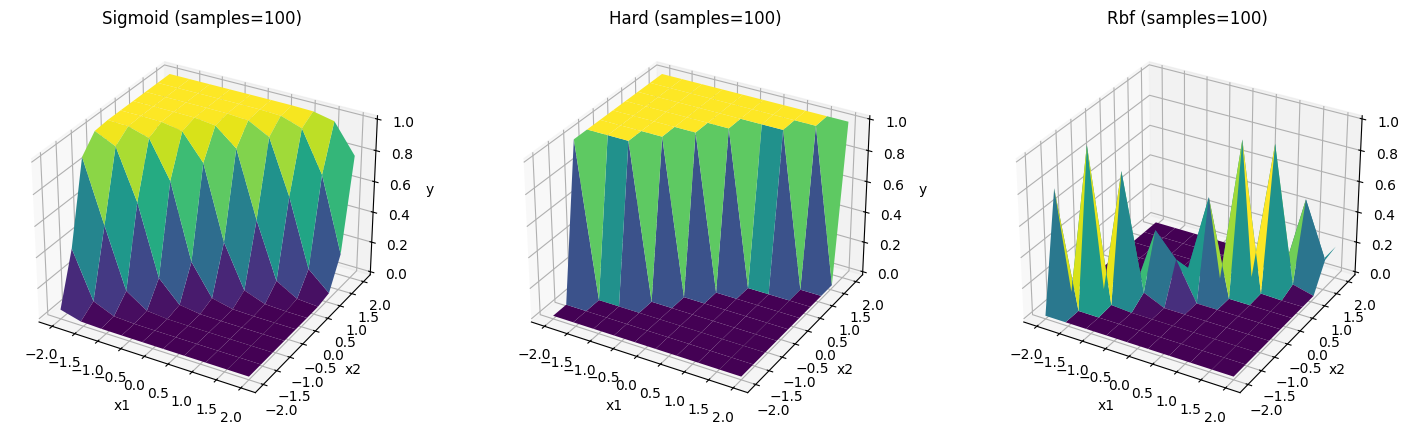

Saved: perceptron_all_5000.png


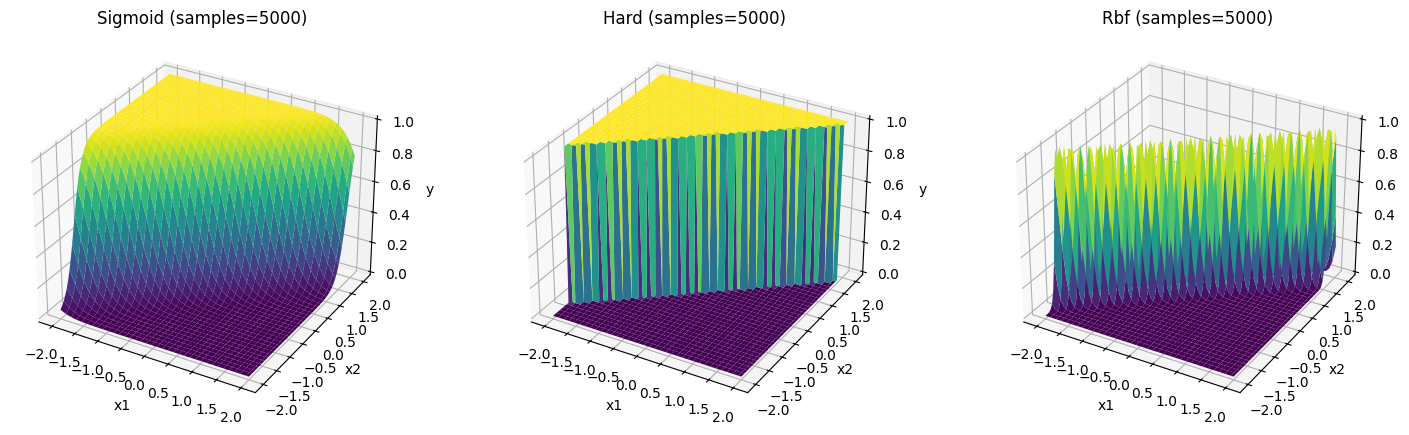

Saved: perceptron_all_10000.png


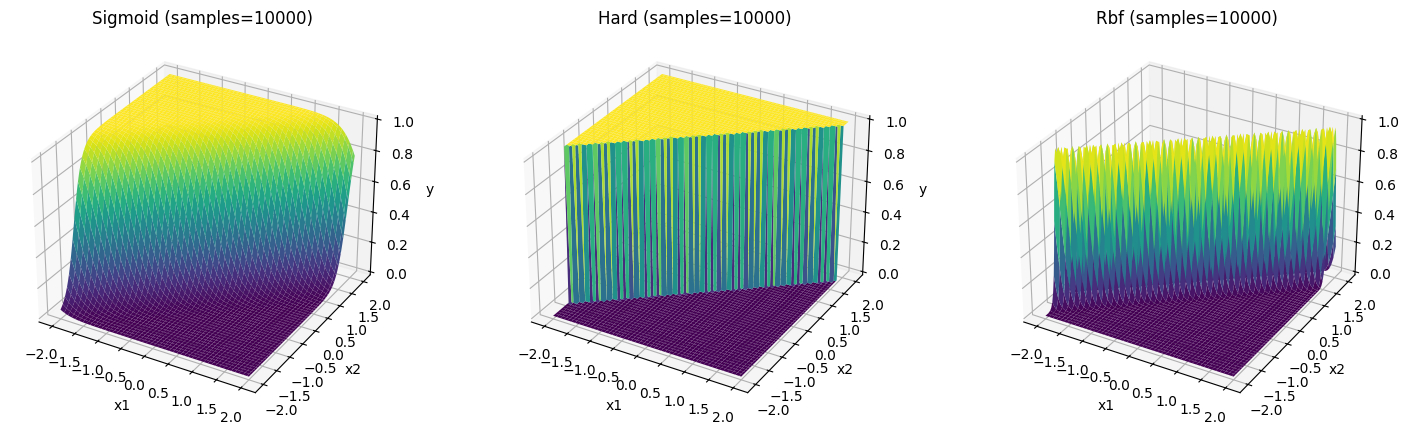

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------
# Define activation functions
# ----------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hard_limit(z):
    return np.where(z >= 0, 1, 0)

def rbf(z):
    return np.exp(-z**2)

# ----------------------------------------
# Perceptron model
# ----------------------------------------
def perceptron(x1, x2, activation="sigmoid"):
    z = -4.79 * x1 + 5.90 * x2 - 0.93
    if activation == "sigmoid":
        return sigmoid(z)
    elif activation == "hard":
        return hard_limit(z)
    elif activation == "rbf":
        return rbf(z)
    else:
        raise ValueError("Unknown activation function")

# ----------------------------------------
# Plot all activations in one figure for given sample size
# ----------------------------------------
def plot_all_activations(sample_size):
    activations = ["sigmoid", "hard", "rbf"]
    fig = plt.figure(figsize=(18, 5))
    
    x1 = np.linspace(-2, 2, int(np.sqrt(sample_size)))
    x2 = np.linspace(-2, 2, int(np.sqrt(sample_size)))
    X1, X2 = np.meshgrid(x1, x2)

    for i, activation in enumerate(activations, 1):
        Y = perceptron(X1, X2, activation)
        ax = fig.add_subplot(1, 3, i, projection="3d")
        ax.plot_surface(X1, X2, Y, cmap="viridis")
        ax.set_title(f"{activation.capitalize()} (samples={sample_size})")
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("y")

    # Save as high-resolution PNG
    filename = f"perceptron_all_{sample_size}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    plt.show()

# ----------------------------------------
# Run for all sample sizes
# ----------------------------------------
for size in [100, 5000, 10000]:
    plot_all_activations(size)
